In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import build_features

In [3]:
def obs2mat(o):
    side = 90
    A = np.zeros((side, side), dtype=np.float64)
    A[np.tril_indices(side)] = o
    A = A + A.T
    A[np.diag_indices(side)] /= 2.0
    
    #A_tilde = A + np.eye(90)
    #D_tilde_inv = np.diag(np.power(np.sum(A_tilde, axis=0), -0.5))
    #A_hat = np.matmul(D_tilde_inv, np.matmul(A_tilde, D_tilde_inv))
    return A

def plot_mat(m, ax=None, vmin=0, vmax=1, cmap="inferno"):
    if ax is None:
        fig, ax = plt.subplots()
    ax.imshow(m, vmin=vmin, vmax=vmax, interpolation="none", aspect="equal", cmap=cmap)
    ax.grid(False)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    return ax

In [4]:
### Load a subset of the data

In [5]:
s01X, s01Y = build_features.prepare_X("S01")

Loading subject S01...
Loaded 824 observations of shape (824, 4095, 50) in 18.16s.


<IPython.core.display.Javascript object>


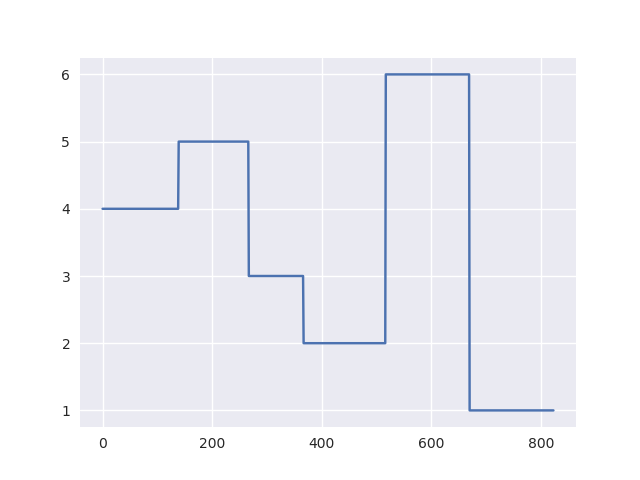

In [8]:
fig, ax = plt.subplots()
ax.plot(s01Y)

In [60]:
print("Min: %f - Max: %f - Mean: %f - Std: %f - Median: %f" % 
      (np.amin(s01X), np.amax(s01X), np.mean(s01X), np.std(s01X), np.median(s01X)))
means = []; medians = []; maxs = []; mins = []; stds = []
for freq in range(s01X.shape[2]):
    print("Freq %d Hz:" % (freq + 1))
    means.append(np.mean(s01X[:,:,freq]))
    medians.append(np.median(s01X[:,:,freq]))
    maxs.append(np.amax(s01X[:,:,freq]))
    mins.append(np.amin(s01X[:,:,freq]))
    stds.append(np.std(s01X[:,:,freq]))
    print("\t Min: %f - Max: %f - Mean: %f - Std: %f - Median: %f" % 
      (mins[-1], maxs[-1], means[-1], 
       stds[-1], medians[-1]))
means = np.asarray(means)
medians = np.asarray(medians)
maxs = np.asarray(maxs)
mins = np.asarray(mins)
stds = np.asarray(stds)

Min: 0.000000 - Max: 0.958619 - Mean: 0.148317 - Std: 0.148108 - Median: 0.104590
Freq 1 Hz:
	 Min: 0.000000 - Max: 0.919626 - Mean: 0.123461 - Std: 0.120694 - Median: 0.087428
Freq 2 Hz:
	 Min: 0.000000 - Max: 0.958619 - Mean: 0.176304 - Std: 0.152969 - Median: 0.139997
Freq 3 Hz:
	 Min: 0.000000 - Max: 0.927390 - Mean: 0.171510 - Std: 0.150086 - Median: 0.136237
Freq 4 Hz:
	 Min: 0.000000 - Max: 0.908110 - Mean: 0.165592 - Std: 0.146713 - Median: 0.130054
Freq 5 Hz:
	 Min: 0.000000 - Max: 0.911918 - Mean: 0.162507 - Std: 0.145735 - Median: 0.126460
Freq 6 Hz:
	 Min: 0.000000 - Max: 0.903926 - Mean: 0.161817 - Std: 0.145198 - Median: 0.126621
Freq 7 Hz:
	 Min: 0.000000 - Max: 0.889265 - Mean: 0.164580 - Std: 0.148373 - Median: 0.128071
Freq 8 Hz:
	 Min: 0.000000 - Max: 0.925632 - Mean: 0.163173 - Std: 0.149575 - Median: 0.125030
Freq 9 Hz:
	 Min: 0.000000 - Max: 0.893519 - Mean: 0.162434 - Std: 0.149660 - Median: 0.123766
Freq 10 Hz:
	 Min: 0.000000 - Max: 0.900943 - Mean: 0.162351 - 

In [79]:
print(np.sum(s01X > 0.3) / s01X.size)

0.183211843712


<IPython.core.display.Javascript object>


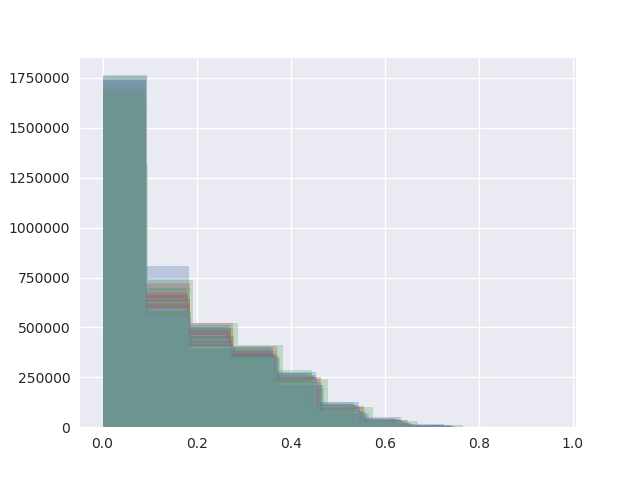

In [70]:
fig, ax = plt.subplots()
for freq in range(s01X.shape[2]):
    ax.hist(s01X[:,:,freq].flatten(), label=f"{freq + 1} Hz", bins=10, alpha=0.3)
#ax.legend(loc="best")

<IPython.core.display.Javascript object>


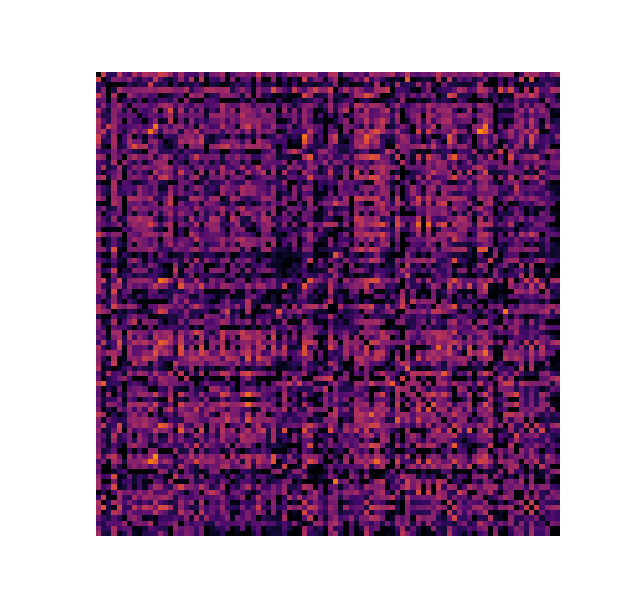

In [101]:
plot_mat(obs2mat(s01X[0,:,3]))

In [39]:
np.sum(obs2mat(s01X[0,:,0]) != obs2mat(s01X[0,:,0]))

0

In [6]:
from TICC.TICC_solver import TICC

def ticc_cluster(subject, n_clusters, window_size, beta):
    ticc = TICC(window_size=window_size, number_of_clusters=n_clusters,
               beta=beta, maxIters=100, threshold=2e-5, 
                write_out_file=False, num_proc=1)
    cluster_assignment, cluster_MRFs = ticc.fit(subject)
    
    fig, ax = plt.subplots()
    ax.plot(cluster_assignment)


In [7]:
ticc_cluster(s01X[:,:,0], n_clusters=2, window_size=1, beta=50)

[10-17 15:08:00] Starting TICC solver with params: 
	lambda_sparse 0.11
	switch_penalty 50
	num_cluster 2
	num stacked 1


[10-17 15:08:13] Iteration 0
[10-17 19:48:24] Finished ADMM for cluster 0


/local/gmeanti/brain_gcn/src/brain_project/TICC/TICC_solver.py:291: RuntimeWarning: divide by zero encountered in log
  log_det[cluster] = np.log(np.linalg.det(cov_out))


[10-18 01:20:05] Finished ADMM for cluster 1
[10-18 01:20:08] Smoothing clusters (calculate log-likelihood).
[10-18 01:20:09] Updating cluster assignments
[10-18 01:20:09] Cluster 1 has 0 samples
[10-18 01:20:09] Length of cluster 0: 804.000000
[10-18 01:20:09] Length of cluster 1: 20.000000






[10-18 01:20:09] Iteration 1
[10-18 06:25:43] Finished ADMM for cluster 0
[10-18 11:39:37] Finished ADMM for cluster 1
[10-18 11:39:40] Smoothing clusters (calculate log-likelihood).
[10-18 11:39:41] Updating cluster assignments
[10-18 11:39:41] Cluster 1 has 0 samples
[10-18 11:39:41] Length of cluster 0: 804.000000
[10-18 11:39:41] Length of cluster 1: 20.000000






[10-18 11:39:41] Iteration 2


Process ForkPoolWorker-1:
Traceback (most recent call last):
  File "/local/gmeanti/anaconda3/envs/ml/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/local/gmeanti/anaconda3/envs/ml/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/local/gmeanti/anaconda3/envs/ml/lib/python3.6/multiprocessing/pool.py", line 119, in worker
    result = (True, func(*args, **kwds))
  File "/local/gmeanti/brain_gcn/src/brain_project/TICC/src/admm_solver.py", line 115, in __call__
    self.ADMM_z()
  File "/local/gmeanti/brain_gcn/src/brain_project/TICC/src/admm_solver.py", line 69, in ADMM_z
    elif rhoPointSum < -1*lamSum:
KeyboardInterrupt

KeyboardInterrupt

Process ForkPoolWorker-2:
Traceback (most recent call last):
  File "/local/gmeanti/anaconda3/envs/ml/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/local/gmeanti/anaconda3/envs/ml/lib/python3.6/mult